# TP 2 - Reinforcement Learning

By Diyun Lu and Gwendal Debaussart

In this assignement, we will focus on the MultiArmed Bandits problem.
You will implement:


- UCB1 https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf

- Besa https://hal.archives-ouvertes.fr/hal-01025651v1/document

- Softmax https://www.cs.mcgill.ca/~vkules/bandits.pdf

- Thompson Sampling Agent https://en.wikipedia.org/wiki/Thompson_sampling

- KL UCB https://hal.archives-ouvertes.fr/hal-00738209v2 (optional)

![image not found:](multiarmedbandit.jpg "Bandits")

You will be evaluated on:
* Implementation of the 6 agents (but KL-UCB optional). Bonus points will be given to clean, scalable code.
* Answering this question -> for each implemented agent, give 1 pros and 1 cons ?

Send this notebook in a html format to cyriaque.rousselot(at)inria(dot)fr before December 8.

Good Luck !

You have to run those cells, you don't need to modify them

## Example : Random Agent and Epsilon Greedy Agent


In `choose`, prescribe how the agent selects its
actions (interact must return an action, that is
an index in [0, ..., 9]).

In `update`, implement how the agent updates
its buffers, using the newly observed `action` and `reward`.

In [1]:
import runner,environment
import numpy as np
import random

### Agent Definition

### Random Agent

Pros:

- Easy to implement

Cons:

- Doesn't use any information that is given.

- Behave really poorly

In [2]:
class RandomAgent:
    def __init__(self,n_a):
        self.n_a = n_a # number of possible actions
        """Init a new agent.
        """

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        return np.random.randint(0, self.n_a)

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        pass



### Epsilon-Greedy Agent

Pros :

- Easy to implement and comprehend the logic behind it

- Behaves a bit better than totally random

Cons :

- Gives really poor results, Can take a "bad" choice too easily.

- Doesn't eliminate the bad result and can not use all of the information, with some probability 1-epsilon.

In [3]:
class epsGreedyAgent:
    def __init__(self,n_a):
        self.n_a = n_a # number of possible actions
        self.A = range(n_a)
        self.mu = {a:[] for a in self.A}
        self.epsilon = 0.5 ##Criterium of Exploration: close to 0: greedy, close to 1: Random

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if len(self.mu[a]) == 0:
                return a

        if np.random.uniform(0,1) > self.epsilon:
            return np.argmax([np.mean(self.mu[a]) for a in self.A])
        else:
            return np.random.randint(0, self.n_a)


    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action].append(reward)

### Agent Evaluation

Simulation step 1:
 ->            action: 3
 ->            reward: 0.27080140354724425
 -> cumulative reward: 0.27080140354724425
Simulation step 2:
 ->            action: 2
 ->            reward: 0.361740947042311
 -> cumulative reward: 0.6325423505895553
Simulation step 3:
 ->            action: 2
 ->            reward: 0.361740947042311
 -> cumulative reward: 0.9942832976318663
Simulation step 4:
 ->            action: 4
 ->            reward: 0.16015765772274165
 -> cumulative reward: 1.154440955354608
Simulation step 5:
 ->            action: 6
 ->            reward: -0.003912490573487016
 -> cumulative reward: 1.150528464781121
Obtained a final reward of 1.150528464781121


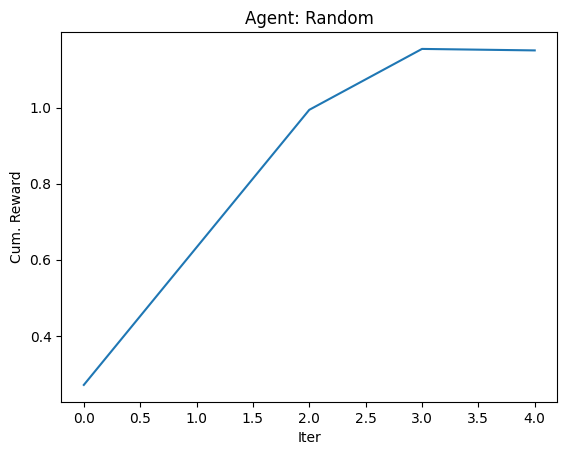

In [4]:
# Looping on a single environement and a single agent
niter = 5
n_actions = 10
my_agent = RandomAgent(n_actions)
my_env = environment.Environment(n_actions)
my_runner = runner.Runner(my_env,my_agent,verbose=True) # The verbose parameter allows displaying every step
final_reward, list_cumul = my_runner.loop(niter)
print("Obtained a final reward of {}".format(final_reward))

from matplotlib import pyplot as plt
plt.plot(list_cumul)
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("Agent: Random")
plt.show()

In [5]:
# Running a batched simulation with n_agents agents in parallel

niter = 1000
n_agents = 10
n_actions = 10

my_runner = runner.BatchRunner(environment.Environment, RandomAgent, n_agents,n_actions, False)
final_reward_rd, list_cumul_rd = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

my_runner = runner.BatchRunner(environment.Environment, epsGreedyAgent, n_agents,n_actions, False)
final_reward_eg, list_cumul_eg = my_runner.loop(niter)
print("Epsilon Greedy Agent obtained a final average reward of {}".format(final_reward_eg))

Random Agent obtained a final average reward of -35.85387165479372
Epsilon Greedy Agent obtained a final average reward of 1492.4901677406092


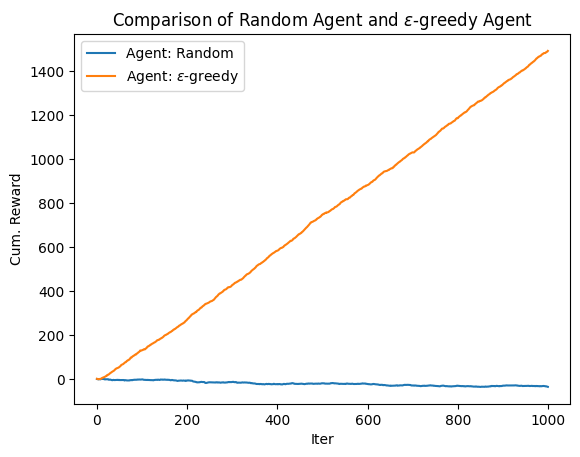

In [6]:
from matplotlib import pyplot as plt

plt.plot(list_cumul_rd,label="Agent: Random")
plt.plot(list_cumul_eg,label="Agent: $\epsilon$-greedy")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("Comparison of Random Agent and $\epsilon$-greedy Agent")
plt.legend()
plt.show()

You can play with the complexity of the environment by modifying the number of possible actions. I suggest that you begin with 10 possible actions

In [7]:
# Running a batched simulation with n_agents agents in parallel

niter = 1000
n_agents = 10
n_actions = 800

my_runner = runner.BatchRunner(environment.Environment, RandomAgent, n_agents,n_actions, False)
final_reward_rd, list_cumul_rd = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

my_runner = runner.BatchRunner(environment.Environment, epsGreedyAgent, n_agents,n_actions, False)
final_reward_eg, list_cumul_eg = my_runner.loop(niter)
print("Epsilon Greedy Agent obtained a final average reward of {}".format(final_reward_eg))

Random Agent obtained a final average reward of -16.73589858046924
Epsilon Greedy Agent obtained a final average reward of 581.6953194541045


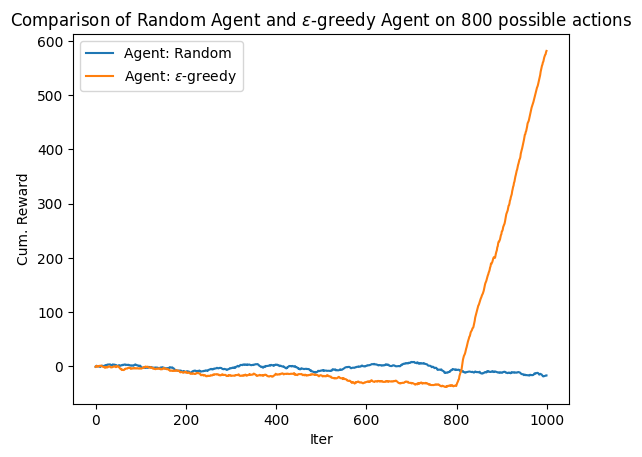

In [8]:
from matplotlib import pyplot as plt

plt.plot(list_cumul_rd,label="Agent: Random")
plt.plot(list_cumul_eg,label="Agent: $\epsilon$-greedy")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title(f"Comparison of Random Agent and $\epsilon$-greedy Agent on {n_actions} possible actions")
plt.legend()
plt.show()

## Your turn !

### UCB-1

Pro : 

- Easy to implement

- Theoretical guarantees

- Stable algorithm, the performances doesn't really relies on bad or good luck. 

Cons:

- Multiple instances where the convergence can be slow

- A bit more sensitive to the case where there's a lot of Action

- In the article it is supposed that the support of the reward probability are in support [0,1]

In [9]:
class UCBAgent:
    # https://homes.di.unimi.it/~cesabian/Pubblicazioni/ml-02.pdf
    def __init__(self,n_actions):
        self.A = range(n_actions)
        # each expected reward for each action
        self.mu = {a:[] for a in self.A}
        self.epsilon = 0.1
        # Number of time each arm has been pulled.
        self.num_arm = np.zeros(len(self.A))
        # Total number of plays.
        self.N = 0 

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """

        # If one arm hasn't been pulled yet
        for a in self.A:
            if len(self.mu[a]) == 0:
                return a

        return np.argmax([np.mean(self.mu[a])+np.sqrt(2 * np.log(self.N)/self.num_arm[i]) for i,a in enumerate(self.A)])


    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.N += 1
        self.num_arm[a] += 1
        self.mu[a].append(r)

### Boltzmann Exploration (Softmax) 

Pros:

- Gives off the best result in all of the model tested

Cons:

- Sensitive to the temperature hyper-parameter, it can really change a lot how the algorithm will behave.

- Sensitive to "bad luck", if the first try of one arm are "poor", then it will never choose the arm, even when it's in fact "good". 

In [10]:
# np.random.multinomialP(nbs,p)

In [11]:
class SoftmaxAgent: # Chose a Temperature between 0.01 and 1
    # https://www.cs.mcgill.ca/~vkules/bandits.pdf
    def __init__(self, n_actions):
        self.A = range(n_actions)
        self.temperature = 0.1 # 0.1 seems to work well but we could surely find a better hyper-param
        self.mu = {a:[] for a in self.A}


    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
                # If one arm hasn't been pulled yet
        for a in self.A:
            if len(self.mu[a]) == 0:
                return a
        
        # When all the arms have been pulled : 
        boltzmann_distribution = np.exp(np.array([np.mean(self.mu[a]) for a in self.A]) / self.temperature)
        boltzmann_distribution /= np.sum(boltzmann_distribution)
        a = np.random.choice(self.A, p=boltzmann_distribution)
        return a

    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.mu[action].append(reward)

### BESA

Pros:

- Non-parametric

- Behave well enough, seems to have good properties empirically

Cons:

-  Seems harder to analyze mathematically and have theoretical guarantees (the only showed guarantees in the paper are on two armed bandit)

In [12]:
class BesaAgent:
    # https://hal.archives-ouvertes.fr/file/index/docid/1025651/filename/BESA2.pdf
    def __init__(self,n_actions):
        self.A = range(n_actions)
        self.num_arm = np.zeros(len(self.A), dtype=int)
        self.mu = {a:[] for a in self.A}

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        #Check every arm at least once
        for a in self.A:
            if len(self.mu[a]) == 0:
                return a
        
        #Once all the arms are checked :
        return self.choose_a_t(self.A[:int(len(self.A)/2)], self.A[int(len(self.A)/2):])   


    def choose_a_t(self, actions_1, actions_2):
        if (len(actions_1) == 0):
            return actions_2[0]
        elif (len(actions_2) == 0):
            return actions_1[0]
        else:
            a = self.choose_a_t(actions_1[:int(len(actions_1)/2)], actions_1[int(len(actions_1)/2):]) 
            b = self.choose_a_t(actions_2[:int(len(actions_2)/2)], actions_2[int(len(actions_2)/2):]) 
            sample_a = random.sample(list(range(self.num_arm[a])), int(min(self.num_arm[a],self.num_arm[b])))
            mu_a = np.mean([self.mu[a][i] for i in sample_a])
            sample_b = random.sample(list(range(self.num_arm[b])), int(min(self.num_arm[b],self.num_arm[b])))
            mu_b = np.mean([self.mu[b][i] for i in sample_b])
             # Returns the arm with the highest empirical mean on the subsets.
            if mu_a >= mu_b:
                return a
            else:
                return b


    def update(self, action, reward):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.num_arm[action] += 1
        self.mu[action].append(reward)

### Thompson Sampling

Pros:

- Seems to have good theoretical guarantees and be well studied

Cons:

- Need to know how the reward function works in order to calculate the posterior

- Seems to depends on the posterior we choose

In [13]:
from scipy.stats import entropy
from scipy.optimize import minimize

In [14]:
class ThompsonAgent:
    def __init__(self, n_actions):
        self.A = range(n_actions)
        self.mu = {a:[] for a in self.A}
        self.sum_squared_rewards = np.zeros(len(self.A)) 
        self.sigma = np.ones(len(self.A)) 
        self.num_arm = np.zeros(len(self.A))


    def choose(self):
        for action in self.A:
            if len(self.mu[action]) == 0:
                return action
        action = np.random.normal(np.array([np.mean(self.mu[a]) for a in self.A]), np.sqrt(self.sigma))
        return np.argmax(action)


    def update(self, action, reward):
        self.num_arm[action] += 1
        self.mu[action].append(reward)
        self.sum_squared_rewards[action] += reward**2
        self.sigma[action] = (self.num_arm[action] - 1)/(self.num_arm[action])*(abs(self.sum_squared_rewards[action]/self.num_arm[action]))

        

### (OPTIONAL) KL-UCB

Pros:

- Maintains some good properties of the UCB 

- Doesn't need to make assumption on the distribution of the rewards except that it's bounded

Cons:

- Takes long to compute (~10min here) wheras UCB is really fast to compute.

In [15]:
from scipy.stats import entropy
from scipy.optimize import minimize

class KLUCBAgent:
    # See: https://hal.archives-ouvertes.fr/hal-00738209v2
    def __init__(self,n_actions):
        self.A = range(n_actions)
        self.mu = {a:[] for a in self.A}
        self.func = lambda x : np.log(x)
        self.num_arm = np.zeros(len(self.A))
        self.N = 0

    def choose(self):
        """Acts in the environment.

        returns the chosen action.
        """
        for a in self.A:
            if len(self.mu[a]) == 0:
                return a
        actions = [self.get_sup(index, action) for index, action in enumerate(self.A)]
        return np.argmax(actions)

    def kl_divergence(self, p, q):
        return entropy(p, q)

    def get_sup(self, index, action):
        
        # """we take the negative min to get maximum"""
        func = lambda x: -x
        cons = {'type': 'ineq', 
        'fun': lambda x: self.kl_divergence(self.mu[action][0], x) - (self.func(self.N)/(self.num_arm[index]+10**(-2)))}
        output = minimize(fun=func, x0=self.mu[action][0], jac=lambda x : -1, method='SLSQP', bounds=[(0, None)], constraints=cons).x[0] 
        return output


    def update(self, a, r):
        """Receive a reward for performing given action on
        given observation.

        This is where your agent can learn.
        """
        self.N += 1
        self.num_arm[a] += 1
        self.mu[a].append(r)

### Comparing all of the agent

In [16]:
# Running a batched simulation with n_agents agents in parallel
niter = 1000
n_agents = 10
n_actions = 10

my_runner = runner.BatchRunner(environment.Environment, RandomAgent, n_agents,n_actions, False)
final_reward_rd, list_cumul_rd = my_runner.loop(niter)
print("Random Agent obtained a final average reward of {}".format(final_reward_rd))

my_runner = runner.BatchRunner(environment.Environment, epsGreedyAgent, n_agents,n_actions, False)
final_reward_eg, list_cumul_eg = my_runner.loop(niter)
print("Epsilon Greedy Agent obtained a final average reward of {}".format(final_reward_eg))

my_runner = runner.BatchRunner(environment.Environment, UCBAgent, n_agents,n_actions, False)
final_reward_ucb, list_cumul_ucb = my_runner.loop(niter)
print("Upper Confidence Bound Agent obtained a final average reward of {}".format(final_reward_ucb))

my_runner = runner.BatchRunner(environment.Environment, SoftmaxAgent, n_agents,n_actions, False)
final_reward_boltzmann, list_cumul_boltzmann = my_runner.loop(niter)
print("Boltzmann Agent obtained a final average reward of {}".format(final_reward_boltzmann))

my_runner = runner.BatchRunner(environment.Environment, BesaAgent, n_agents, n_actions, False)
final_reward_besa, list_cumul_besa = my_runner.loop(niter)
print("Besa Agent obtained a final average reward of {}".format(final_reward_besa))

my_runner = runner.BatchRunner(environment.Environment, ThompsonAgent, n_agents, n_actions, False)
final_reward_thompson, list_cumul_thompson = my_runner.loop(niter)
print("Thompson Agent obtained a final average reward of {}".format(final_reward_thompson))

my_runner = runner.BatchRunner(environment.Environment, KLUCBAgent, n_agents, n_actions, False)
final_reward_klucb, list_cumul_klucb = my_runner.loop(niter)
print("KLUCB Agent obtained a final average reward of {}".format(final_reward_klucb))

Random Agent obtained a final average reward of -75.72464518524913
Epsilon Greedy Agent obtained a final average reward of 1635.0641652131883
Upper Confidence Bound Agent obtained a final average reward of 2051.469117616278
Boltzmann Agent obtained a final average reward of 1349.0880737652794
Besa Agent obtained a final average reward of 1413.1962395538505
Thompson Agent obtained a final average reward of 755.5070270033311
/shared-libs/python3.9/py/lib/python3.9/site-packages/scipy/stats/_entropy.py:83: RuntimeWarning: invalid value encountered in divide
  qk = 1.0*qk / np.sum(qk, axis=axis, keepdims=True)
KLUCB Agent obtained a final average reward of 71.69932432850742


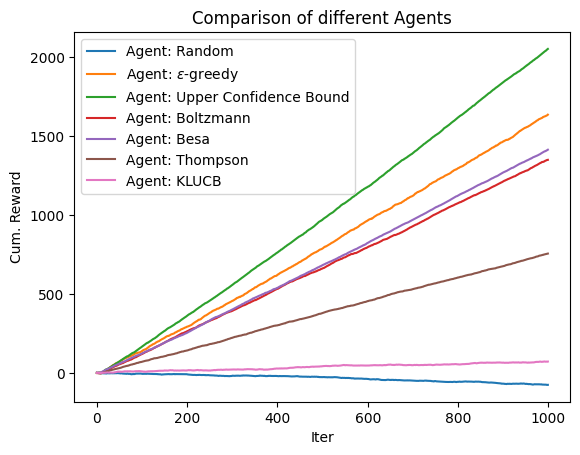

In [18]:
from matplotlib import pyplot as plt

plt.plot(list_cumul_rd,label="Agent: Random")
plt.plot(list_cumul_eg,label="Agent: $\epsilon$-greedy")
plt.plot(list_cumul_ucb,label="Agent: Upper Confidence Bound")
plt.plot(list_cumul_boltzmann,label="Agent: Boltzmann")
plt.plot(list_cumul_besa,label="Agent: Besa")
plt.plot(list_cumul_thompson,label="Agent: Thompson")
plt.plot(list_cumul_klucb,label="Agent: KLUCB")
plt.xlabel("Iter")
plt.ylabel("Cum. Reward")
plt.title("Comparison of different Agents")
plt.legend()
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c4d4ca24-5f93-445d-849c-81431b0dd1b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>